# M-Lab Data Exploratory Analysis

**Dataset:** 50,000 NDT measurements from M-Lab (Oct 12 - Nov 9, 2025)

**Objectives:**
1. Understand data distribution and quality
2. Analyze RTT vs throughput relationships
3. Geographic performance patterns
4. Server performance comparison
5. Temporal patterns and trends
6. Identify features for multi-metric CDN selection

**Why this matters:**
- Baseline understanding before combining with RIPE Atlas and Lumos5G
- Identify which metrics are most predictive
- Find patterns that RTT-only selection might miss

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries loaded")

✓ Libraries loaded


## 1. Load and Inspect Data

In [4]:
# Load M-Lab data
data_file = '../../data/raw/mlab_ndt_us_30days_20251111_004612.csv'

df_mlab = pd.read_csv(data_file)

print("=" * 60)
print("M-Lab Dataset Overview")
print("=" * 60)
print(f"Shape: {df_mlab.shape[0]:,} rows × {df_mlab.shape[1]} columns")
print(f"Date range: {df_mlab['date'].min()} to {df_mlab['date'].max()}")
print(f"Memory usage: {df_mlab.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print()
print("Columns:")
for col in df_mlab.columns:
    print(f"  • {col}")

M-Lab Dataset Overview
Shape: 50,000 rows × 14 columns
Date range: 2025-10-12 to 2025-11-09
Memory usage: 19.9 MB

Columns:
  • date
  • client_lat
  • client_lon
  • client_city
  • client_country
  • client_asn
  • client_isp
  • server_lat
  • server_lon
  • server_site
  • server_city
  • download_mbps
  • min_rtt_ms
  • packet_loss_rate


In [5]:
# Display first few rows
print("\nFirst 5 rows:")
df_mlab.head()


First 5 rows:


,date,client_lat,client_lon,client_city,client_country,client_asn,client_isp,server_lat,server_lon,server_site,server_city,download_mbps,min_rtt_ms,packet_loss_rate
0,2025-10-13,37.751,-97.822,NaN,US,399829,NaN,49.0097,2.54778,par08,Paris,105.963708,126.343,0.076370
1,2025-10-13,37.751,-97.822,NaN,US,11232,Midcontinent Communications,49.9100,-97.23990,ywg02,Winnipeg,91.220665,24.291,0.021422
2,2025-10-13,37.751,-97.822,NaN,US,12025,"IO Capital Princess, LLC",50.1008,14.26000,prg05,Prague,137.549435,148.011,0.000000
3,2025-10-13,37.751,-97.822,NaN,US,53770,iQor US Inc.,14.5086,121.01940,mnl01,Manila,0.183967,516.966,0.000000
4,2025-10-13,37.751,-97.822,NaN,US,36692,"OpenDNS, LLC",42.6967,23.41140,sof02,Sofia,45.324108,113.205,0.000000


In [6]:
# Data types and missing values
print("Data Info:")
print("=" * 60)
df_mlab.info()
print()
print("Missing Values:")
print(df_mlab.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              50000 non-null  object 
 1   client_lat        50000 non-null  float64
 2   client_lon        50000 non-null  float64
 3   client_city       48002 non-null  object 
 4   client_country    50000 non-null  object 
 5   client_asn        50000 non-null  int64  
 6   client_isp        48704 non-null  object 
 7   server_lat        50000 non-null  float64
 8   server_lon        50000 non-null  float64
 9   server_site       50000 non-null  object 
 10  server_city       50000 non-null  object 
 11  download_mbps     50000 non-null  float64
 12  min_rtt_ms        50000 non-null  float64
 13  packet_loss_rate  50000 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 5.3+ MB

Missing Values:
date                   0
client_lat             0

## 2. Summary Statistics

In [7]:
# Key metrics summary
print("=" * 60)
print("Performance Metrics Summary")
print("=" * 60)
print()

metrics = ['download_mbps', 'min_rtt_ms', 'packet_loss_rate']

for metric in metrics:
    if metric in df_mlab.columns:
        print(f"{metric}:")
        print(f"  Count:  {df_mlab[metric].count():,}")
        print(f"  Mean:   {df_mlab[metric].mean():.2f}")
        print(f"  Median: {df_mlab[metric].median():.2f}")
        print(f"  Std:    {df_mlab[metric].std():.2f}")
        print(f"  Min:    {df_mlab[metric].min():.2f}")
        print(f"  Max:    {df_mlab[metric].max():.2f}")
        print()

Performance Metrics Summary

download_mbps:
  Count:  50,000
  Mean:   210.44
  Median: 118.23
  Std:    246.62
  Min:    0.01
  Max:    6795.57

min_rtt_ms:
  Count:  50,000
  Mean:   24.56
  Median: 14.40
  Std:    50.08
  Min:    0.06
  Max:    2612.84

packet_loss_rate:
  Count:  50,000
  Mean:   0.02
  Median: 0.00
  Std:    0.05
  Min:    0.00
  Max:    0.64



/var/folders/p7/04x723kn34q8z3prqfmdh3bh0000gn/T/ipykernel_99273/2811602335.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([df_mlab['download_mbps'], df_mlab['min_rtt_ms']],


✓ Distribution plots saved


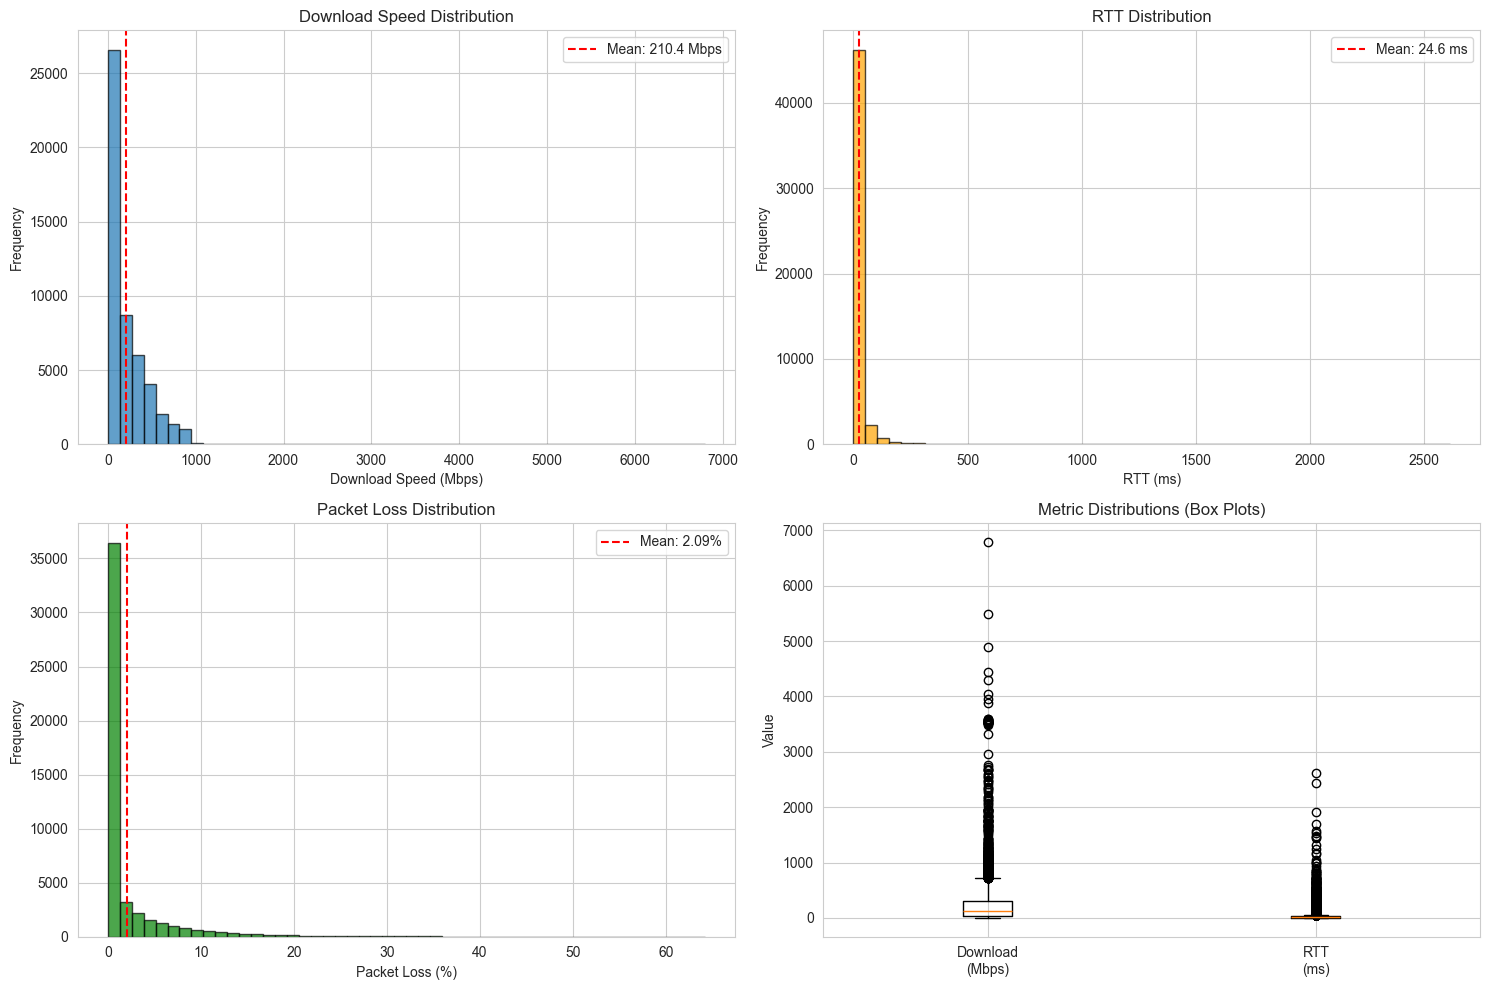

In [8]:
# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Download speed distribution
axes[0, 0].hist(df_mlab['download_mbps'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Download Speed (Mbps)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Download Speed Distribution')
axes[0, 0].axvline(df_mlab['download_mbps'].mean(), color='red', 
                   linestyle='--', label=f"Mean: {df_mlab['download_mbps'].mean():.1f} Mbps")
axes[0, 0].legend()

# RTT distribution
axes[0, 1].hist(df_mlab['min_rtt_ms'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('RTT (ms)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('RTT Distribution')
axes[0, 1].axvline(df_mlab['min_rtt_ms'].mean(), color='red', 
                   linestyle='--', label=f"Mean: {df_mlab['min_rtt_ms'].mean():.1f} ms")
axes[0, 1].legend()

# Packet loss distribution (log scale)
if 'packet_loss_rate' in df_mlab.columns:
    loss_data = df_mlab['packet_loss_rate'].dropna()
    if len(loss_data) > 0:
        axes[1, 0].hist(loss_data * 100, bins=50, edgecolor='black', alpha=0.7, color='green')
        axes[1, 0].set_xlabel('Packet Loss (%)')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].set_title('Packet Loss Distribution')
        axes[1, 0].axvline(loss_data.mean() * 100, color='red', 
                          linestyle='--', label=f"Mean: {loss_data.mean()*100:.2f}%")
        axes[1, 0].legend()

# Box plots for all metrics
metrics_data = df_mlab[['download_mbps', 'min_rtt_ms']].copy()
if 'packet_loss_rate' in df_mlab.columns:
    metrics_data['packet_loss_%'] = df_mlab['packet_loss_rate'] * 100

axes[1, 1].boxplot([df_mlab['download_mbps'], df_mlab['min_rtt_ms']], 
                    labels=['Download\n(Mbps)', 'RTT\n(ms)'])
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_title('Metric Distributions (Box Plots)')

plt.tight_layout()
plt.savefig('../../results/figures/mlab_distribution_overview.png', dpi=300, bbox_inches='tight')
print("✓ Distribution plots saved")
plt.show()

## 3. RTT vs Throughput Correlation

**Key Question:** How well does RTT predict throughput? 
This is critical because traditional CDN selection uses RTT only.

✓ RTT vs throughput plot saved


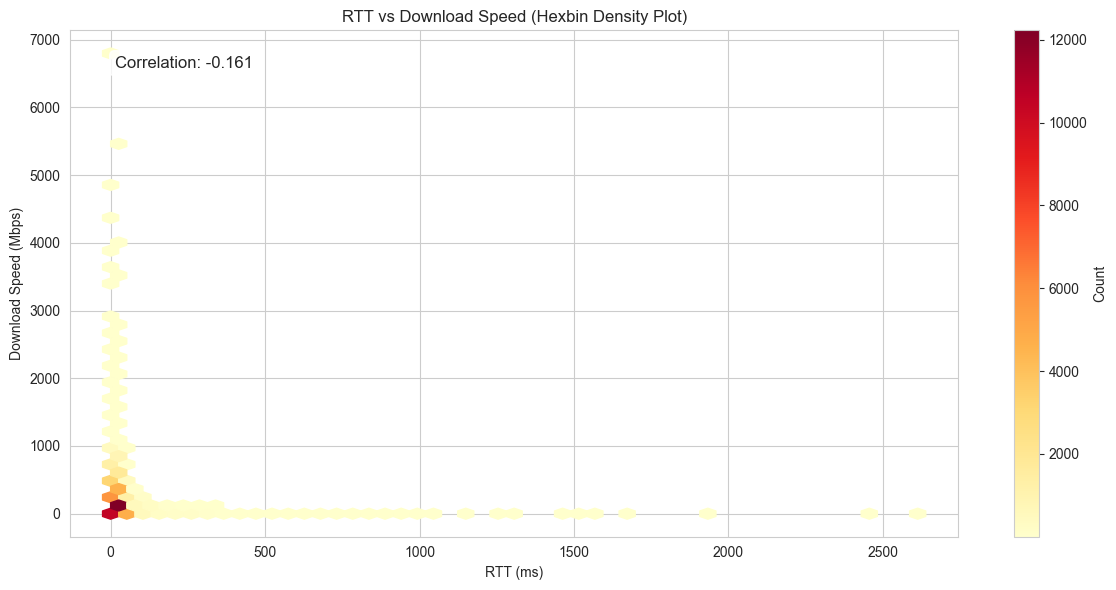

Pearson Correlation (RTT vs Download Speed): -0.161
Interpretation: Weak negative correlation


In [9]:
# RTT vs Download Speed scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot with density
plt.hexbin(df_mlab['min_rtt_ms'], df_mlab['download_mbps'], 
           gridsize=50, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('RTT (ms)')
plt.ylabel('Download Speed (Mbps)')
plt.title('RTT vs Download Speed (Hexbin Density Plot)')

# Add correlation coefficient
corr = df_mlab['min_rtt_ms'].corr(df_mlab['download_mbps'])
plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         verticalalignment='top', fontsize=12)

plt.tight_layout()
plt.savefig('../../results/figures/mlab_rtt_vs_throughput.png', dpi=300, bbox_inches='tight')
print("✓ RTT vs throughput plot saved")
plt.show()

print(f"Pearson Correlation (RTT vs Download Speed): {corr:.3f}")
print(f"Interpretation: {'Weak' if abs(corr) < 0.3 else 'Moderate' if abs(corr) < 0.7 else 'Strong'} {'negative' if corr < 0 else 'positive'} correlation")


Average Download Speed by RTT Range:
                            mean      median         std  count
rtt_bin                                                        
(-2.554, 261.337]     211.754022  119.220399  246.878871  49675
(261.337, 522.615]     11.695034    2.579386   16.168622    254
(522.615, 783.893]      1.151361    0.255256    2.769405     46
(783.893, 1045.171]     0.430173    0.112461    0.813759     12
(1045.171, 1306.449]    0.101180    0.118302    0.043325      3
(1306.449, 1567.727]    0.071410    0.076652    0.029325      6
(1567.727, 1829.005]    0.111914    0.111914         NaN      1
(1829.005, 2090.283]    0.056007    0.056007         NaN      1
(2090.283, 2351.561]         NaN         NaN         NaN      0
(2351.561, 2612.839]    0.020343    0.020343    0.001183      2



/var/folders/p7/04x723kn34q8z3prqfmdh3bh0000gn/T/ipykernel_99273/2766934434.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rtt_bin_stats = df_mlab.groupby('rtt_bin')['download_mbps'].agg(['mean', 'median', 'std', 'count'])


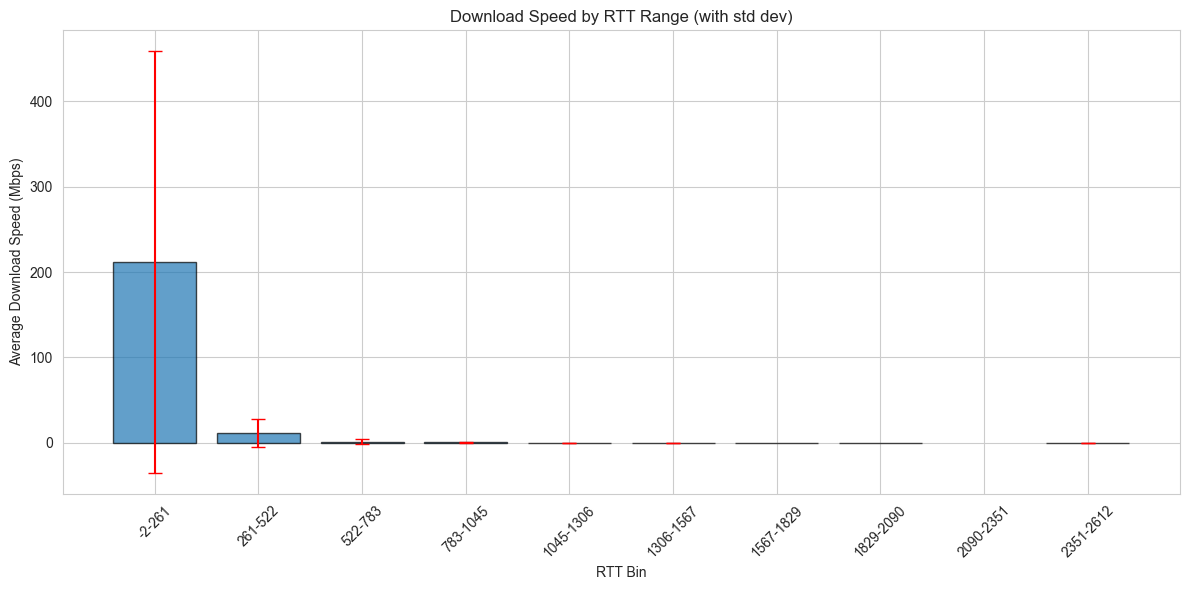

💡 Key Insight: Does lower RTT always mean higher throughput?


In [10]:
# Binned analysis: RTT ranges vs average throughput
df_mlab['rtt_bin'] = pd.cut(df_mlab['min_rtt_ms'], bins=10)
rtt_bin_stats = df_mlab.groupby('rtt_bin')['download_mbps'].agg(['mean', 'median', 'std', 'count'])

print("\nAverage Download Speed by RTT Range:")
print("=" * 60)
print(rtt_bin_stats)
print()

# Plot
plt.figure(figsize=(12, 6))
rtt_bin_centers = [interval.mid for interval in rtt_bin_stats.index]
plt.bar(range(len(rtt_bin_stats)), rtt_bin_stats['mean'], alpha=0.7, edgecolor='black')
plt.errorbar(range(len(rtt_bin_stats)), rtt_bin_stats['mean'], 
             yerr=rtt_bin_stats['std'], fmt='none', color='red', capsize=5)
plt.xlabel('RTT Bin')
plt.ylabel('Average Download Speed (Mbps)')
plt.title('Download Speed by RTT Range (with std dev)')
plt.xticks(range(len(rtt_bin_stats)), 
           [f"{int(interval.left)}-{int(interval.right)}" for interval in rtt_bin_stats.index], 
           rotation=45)
plt.tight_layout()
plt.show()

print("💡 Key Insight: Does lower RTT always mean higher throughput?")

## 4. Geographic Analysis

In [11]:
# Top cities by measurement count
print("=" * 60)
print("Top 20 Cities by Measurement Count")
print("=" * 60)

top_cities = df_mlab['client_city'].value_counts().head(20)
print(top_cities)
print()

# Average performance by city
print("=" * 60)
print("Performance Metrics for Top 10 Cities")
print("=" * 60)

top_10_cities = df_mlab['client_city'].value_counts().head(10).index
city_stats = df_mlab[df_mlab['client_city'].isin(top_10_cities)].groupby('client_city').agg({
    'download_mbps': ['mean', 'median', 'std'],
    'min_rtt_ms': ['mean', 'median', 'std'],
    'client_city': 'count'
}).round(2)

city_stats.columns = ['_'.join(col).strip() for col in city_stats.columns.values]
city_stats = city_stats.rename(columns={'client_city_count': 'count'})
city_stats = city_stats.sort_values('download_mbps_mean', ascending=False)
print(city_stats)

Top 20 Cities by Measurement Count
client_city
Chicago          1801
New York         1392
Los Angeles      1271
Seattle           818
Miami             794
Denver            656
San Jose          582
Phoenix           578
Atlanta           552
Dallas            539
Brooklyn          462
Houston           455
Ashburn           453
Boston            392
Philadelphia      380
Las Vegas         363
Minneapolis       358
San Francisco     354
San Diego         349
Washington        324
Name: count, dtype: int64

Performance Metrics for Top 10 Cities
             download_mbps_mean  download_mbps_median  download_mbps_std  \
client_city                                                                
New York                 235.99                111.85             455.99   
Miami                    225.66                145.49             259.91   
Los Angeles              191.87                 99.43             260.61   
San Jose                 191.86                105.41             24

✓ City performance plots saved


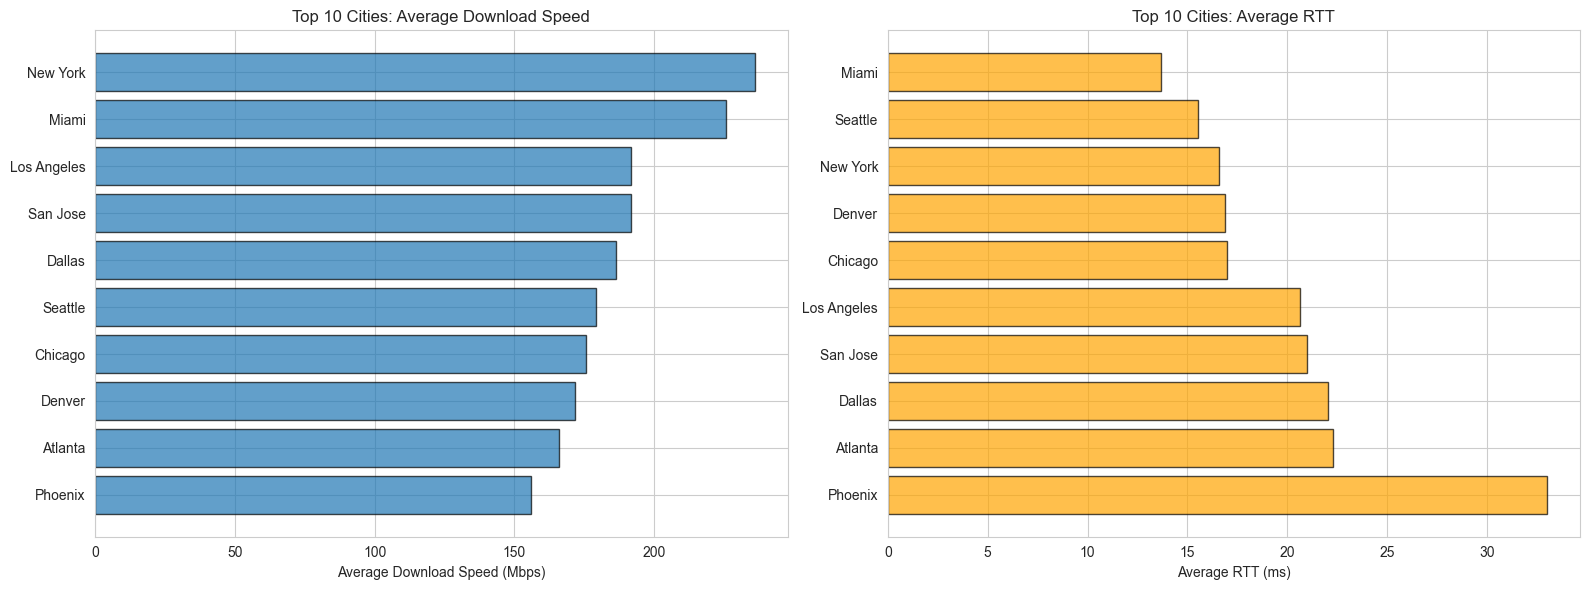

In [12]:
# Visualization: Top cities performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Download speed by city
city_speed = df_mlab[df_mlab['client_city'].isin(top_10_cities)].groupby('client_city')['download_mbps'].mean().sort_values(ascending=False)
axes[0].barh(range(len(city_speed)), city_speed.values, alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(city_speed)))
axes[0].set_yticklabels(city_speed.index)
axes[0].set_xlabel('Average Download Speed (Mbps)')
axes[0].set_title('Top 10 Cities: Average Download Speed')
axes[0].invert_yaxis()

# RTT by city
city_rtt = df_mlab[df_mlab['client_city'].isin(top_10_cities)].groupby('client_city')['min_rtt_ms'].mean().sort_values()
axes[1].barh(range(len(city_rtt)), city_rtt.values, alpha=0.7, color='orange', edgecolor='black')
axes[1].set_yticks(range(len(city_rtt)))
axes[1].set_yticklabels(city_rtt.index)
axes[1].set_xlabel('Average RTT (ms)')
axes[1].set_title('Top 10 Cities: Average RTT')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../../results/figures/mlab_city_performance.png', dpi=300, bbox_inches='tight')
print("✓ City performance plots saved")
plt.show()

## 5. Server Analysis

In [13]:
# Top servers
print("=" * 60)
print("Top 20 M-Lab Servers by Measurement Count")
print("=" * 60)

top_servers = df_mlab['server_site'].value_counts().head(20)
print(top_servers)
print()

# Server performance comparison
print("=" * 60)
print("Performance Metrics for Top 10 Servers")
print("=" * 60)

top_10_servers = df_mlab['server_site'].value_counts().head(10).index
server_stats = df_mlab[df_mlab['server_site'].isin(top_10_servers)].groupby('server_site').agg({
    'download_mbps': ['mean', 'median', 'std'],
    'min_rtt_ms': ['mean', 'median', 'std'],
    'server_site': 'count'
}).round(2)

server_stats.columns = ['_'.join(col).strip() for col in server_stats.columns.values]
server_stats = server_stats.rename(columns={'server_site_count': 'count'})
server_stats = server_stats.sort_values('download_mbps_mean', ascending=False)
print(server_stats)

Top 20 M-Lab Servers by Measurement Count
server_site
chs02    2490
lax04    2250
ord06    2195
lax06    2191
ord03    2134
ord02    2114
lga06    1953
lga05    1946
oma02    1901
lga04    1896
lga08    1860
dfw02    1578
dfw08    1571
dfw03    1542
las02    1514
iad03    1236
iad04    1157
iad02    1151
mia05    1114
mia04    1084
Name: count, dtype: int64

Performance Metrics for Top 10 Servers
             download_mbps_mean  download_mbps_median  download_mbps_std  \
server_site                                                                
lga04                    244.94                142.72             343.25   
lga05                    236.12                133.90             307.46   
lax04                    227.04                128.77             260.07   
ord06                    220.31                130.37             262.22   
lax06                    212.98                113.20             231.22   
ord03                    212.36                125.83             22

✓ Server performance plots saved


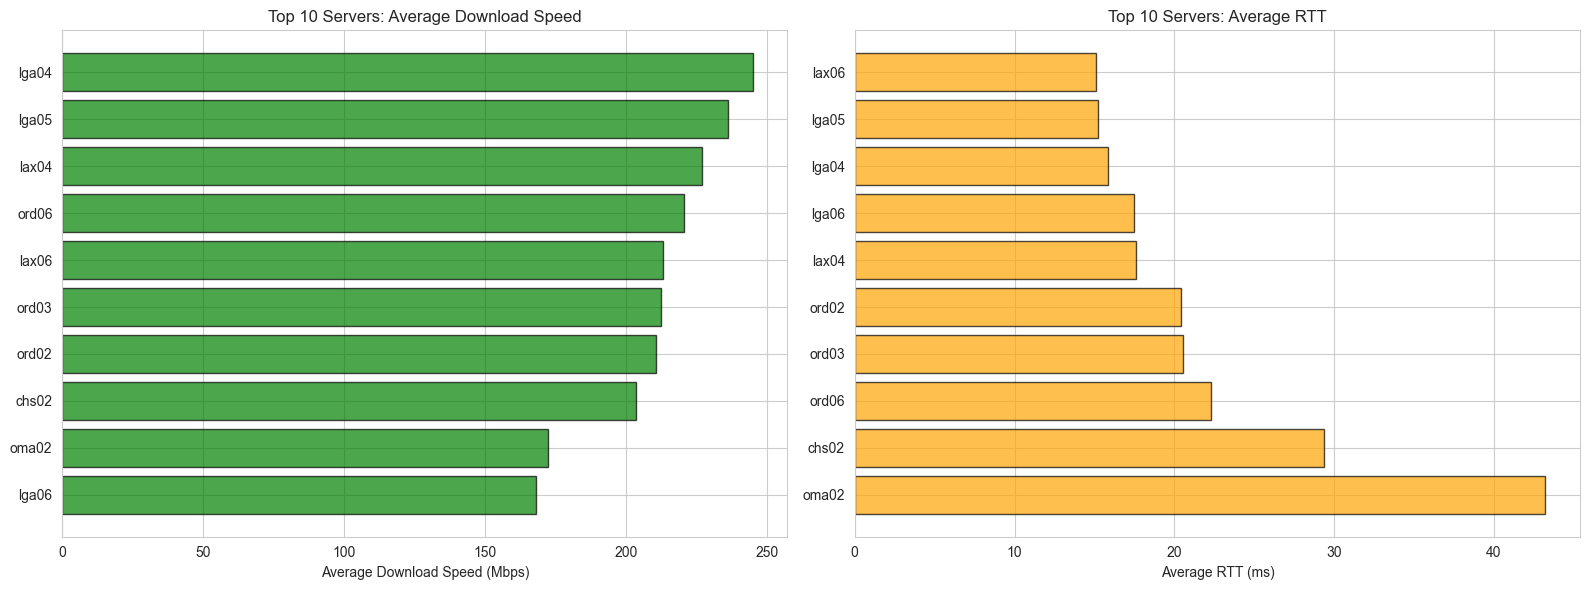

In [14]:
# Server performance visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Download speed by server
server_speed = df_mlab[df_mlab['server_site'].isin(top_10_servers)].groupby('server_site')['download_mbps'].mean().sort_values(ascending=False)
axes[0].barh(range(len(server_speed)), server_speed.values, alpha=0.7, color='green', edgecolor='black')
axes[0].set_yticks(range(len(server_speed)))
axes[0].set_yticklabels(server_speed.index)
axes[0].set_xlabel('Average Download Speed (Mbps)')
axes[0].set_title('Top 10 Servers: Average Download Speed')
axes[0].invert_yaxis()

# RTT by server
server_rtt = df_mlab[df_mlab['server_site'].isin(top_10_servers)].groupby('server_site')['min_rtt_ms'].mean().sort_values()
axes[1].barh(range(len(server_rtt)), server_rtt.values, alpha=0.7, color='orange', edgecolor='black')
axes[1].set_yticks(range(len(server_rtt)))
axes[1].set_yticklabels(server_rtt.index)
axes[1].set_xlabel('Average RTT (ms)')
axes[1].set_title('Top 10 Servers: Average RTT')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../../results/figures/mlab_server_performance.png', dpi=300, bbox_inches='tight')
print("✓ Server performance plots saved")
plt.show()

## 6. Temporal Patterns

In [15]:
# Convert date to datetime
df_mlab['date_dt'] = pd.to_datetime(df_mlab['date'])
df_mlab['day_of_week'] = df_mlab['date_dt'].dt.day_name()
df_mlab['week_num'] = df_mlab['date_dt'].dt.isocalendar().week

# Performance by day of week
print("=" * 60)
print("Average Performance by Day of Week")
print("=" * 60)

dow_stats = df_mlab.groupby('day_of_week').agg({
    'download_mbps': ['mean', 'median', 'std'],
    'min_rtt_ms': ['mean', 'median', 'std'],
    'day_of_week': 'count'
}).round(2)

dow_stats.columns = ['_'.join(col).strip() for col in dow_stats.columns.values]
dow_stats = dow_stats.rename(columns={'day_of_week_count': 'count'})

# Reorder by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_stats = dow_stats.reindex([d for d in day_order if d in dow_stats.index])
print(dow_stats)

Average Performance by Day of Week
             download_mbps_mean  download_mbps_median  download_mbps_std  \
day_of_week                                                                
Monday                   208.92                117.51             238.95   
Tuesday                  307.98                 90.99             726.83   
Wednesday                251.83                143.57             407.73   
Thursday                 232.90                137.17             302.38   
Friday                   253.10                147.50             423.60   
Saturday                 234.14                139.84             521.76   
Sunday                   282.70                161.26             499.31   

             min_rtt_ms_mean  min_rtt_ms_median  min_rtt_ms_std  count  
day_of_week                                                             
Monday                 24.73              14.49           50.58  47664  
Tuesday                16.78              12.96           17.

✓ Temporal trend plots saved


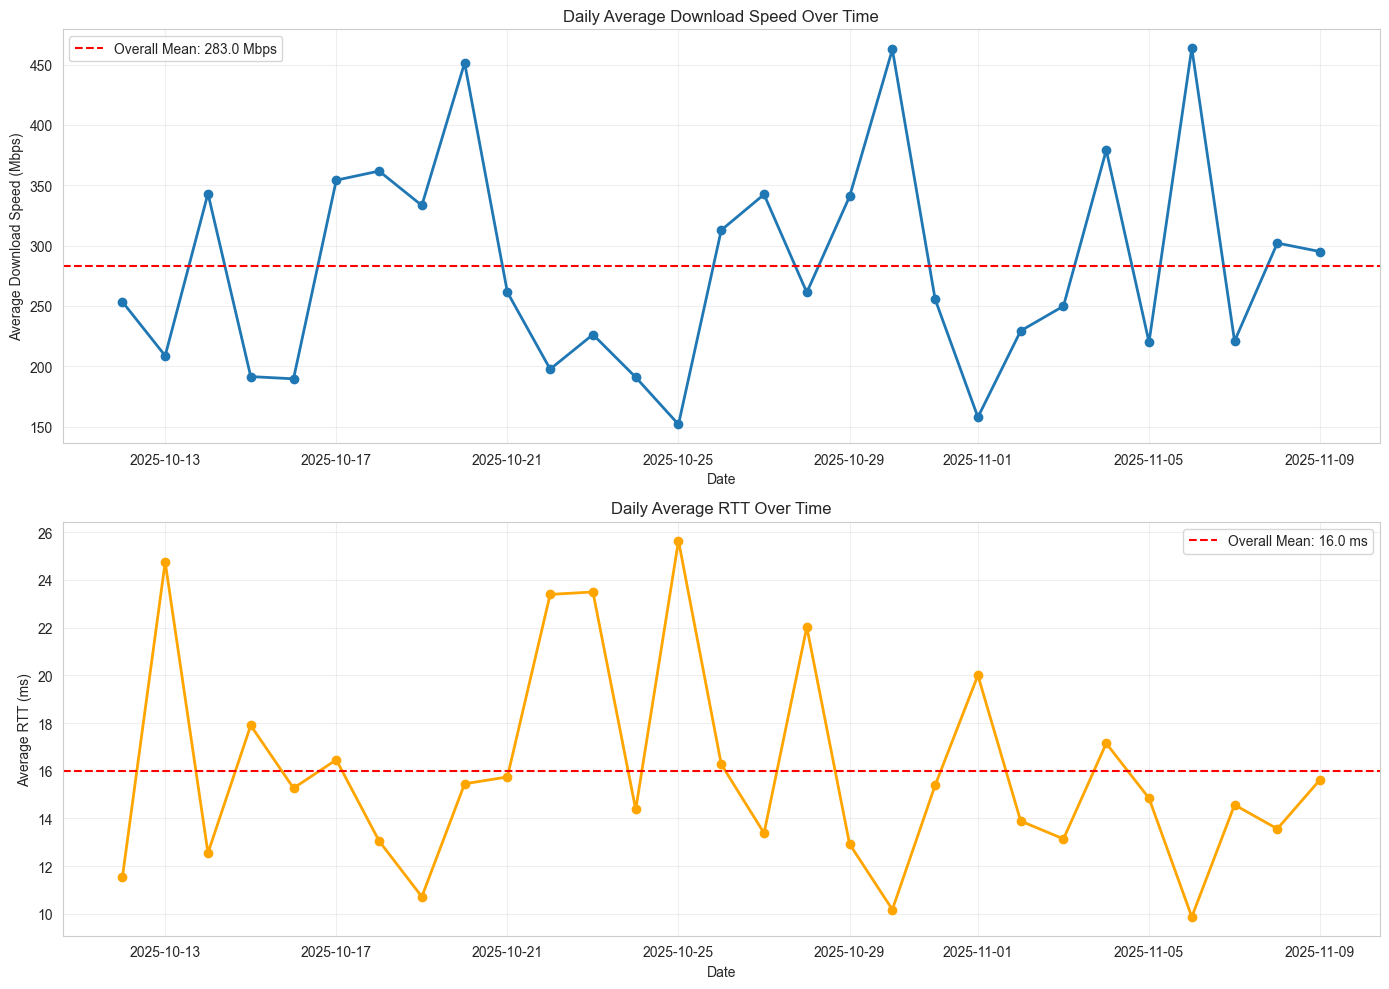

In [16]:
# Temporal trends visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Daily average throughput over time
daily_avg = df_mlab.groupby('date_dt')['download_mbps'].mean()
axes[0].plot(daily_avg.index, daily_avg.values, marker='o', linewidth=2)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average Download Speed (Mbps)')
axes[0].set_title('Daily Average Download Speed Over Time')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(daily_avg.mean(), color='red', linestyle='--', label=f'Overall Mean: {daily_avg.mean():.1f} Mbps')
axes[0].legend()

# Daily average RTT over time
daily_rtt = df_mlab.groupby('date_dt')['min_rtt_ms'].mean()
axes[1].plot(daily_rtt.index, daily_rtt.values, marker='o', color='orange', linewidth=2)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average RTT (ms)')
axes[1].set_title('Daily Average RTT Over Time')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(daily_rtt.mean(), color='red', linestyle='--', label=f'Overall Mean: {daily_rtt.mean():.1f} ms')
axes[1].legend()

plt.tight_layout()
plt.savefig('../../results/figures/mlab_temporal_trends.png', dpi=300, bbox_inches='tight')
print("✓ Temporal trend plots saved")
plt.show()

## 7. Multi-Metric Analysis

**Goal:** Explore relationships between multiple metrics to identify patterns that RTT-only selection would miss.

Correlation Matrix: All Numeric Metrics
✓ Correlation matrix saved


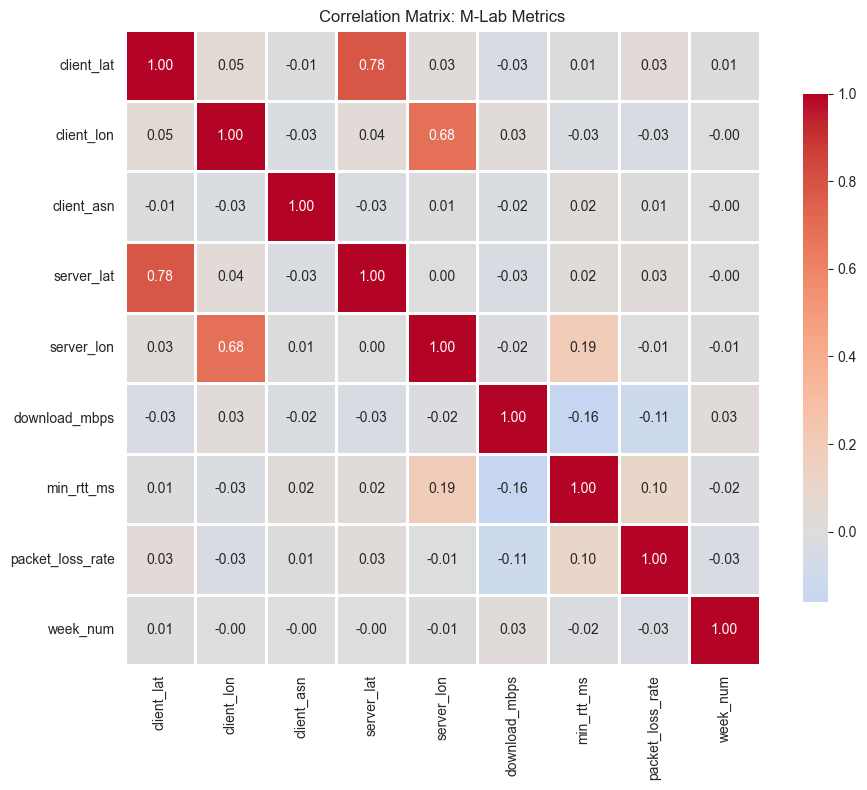


Key Correlations:
download_mbps       1.000000
week_num            0.033048
client_lon          0.027916
server_lon         -0.020088
client_asn         -0.022977
server_lat         -0.031923
client_lat         -0.032952
packet_loss_rate   -0.110841
min_rtt_ms         -0.160700
Name: download_mbps, dtype: float64


In [17]:
# Correlation matrix
print("=" * 60)
print("Correlation Matrix: All Numeric Metrics")
print("=" * 60)

numeric_cols = df_mlab.select_dtypes(include=[np.number]).columns
corr_matrix = df_mlab[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: M-Lab Metrics')
plt.tight_layout()
plt.savefig('../../results/figures/mlab_correlation_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Correlation matrix saved")
plt.show()

print("\nKey Correlations:")
print(corr_matrix['download_mbps'].sort_values(ascending=False))

✓ Scatter matrix saved


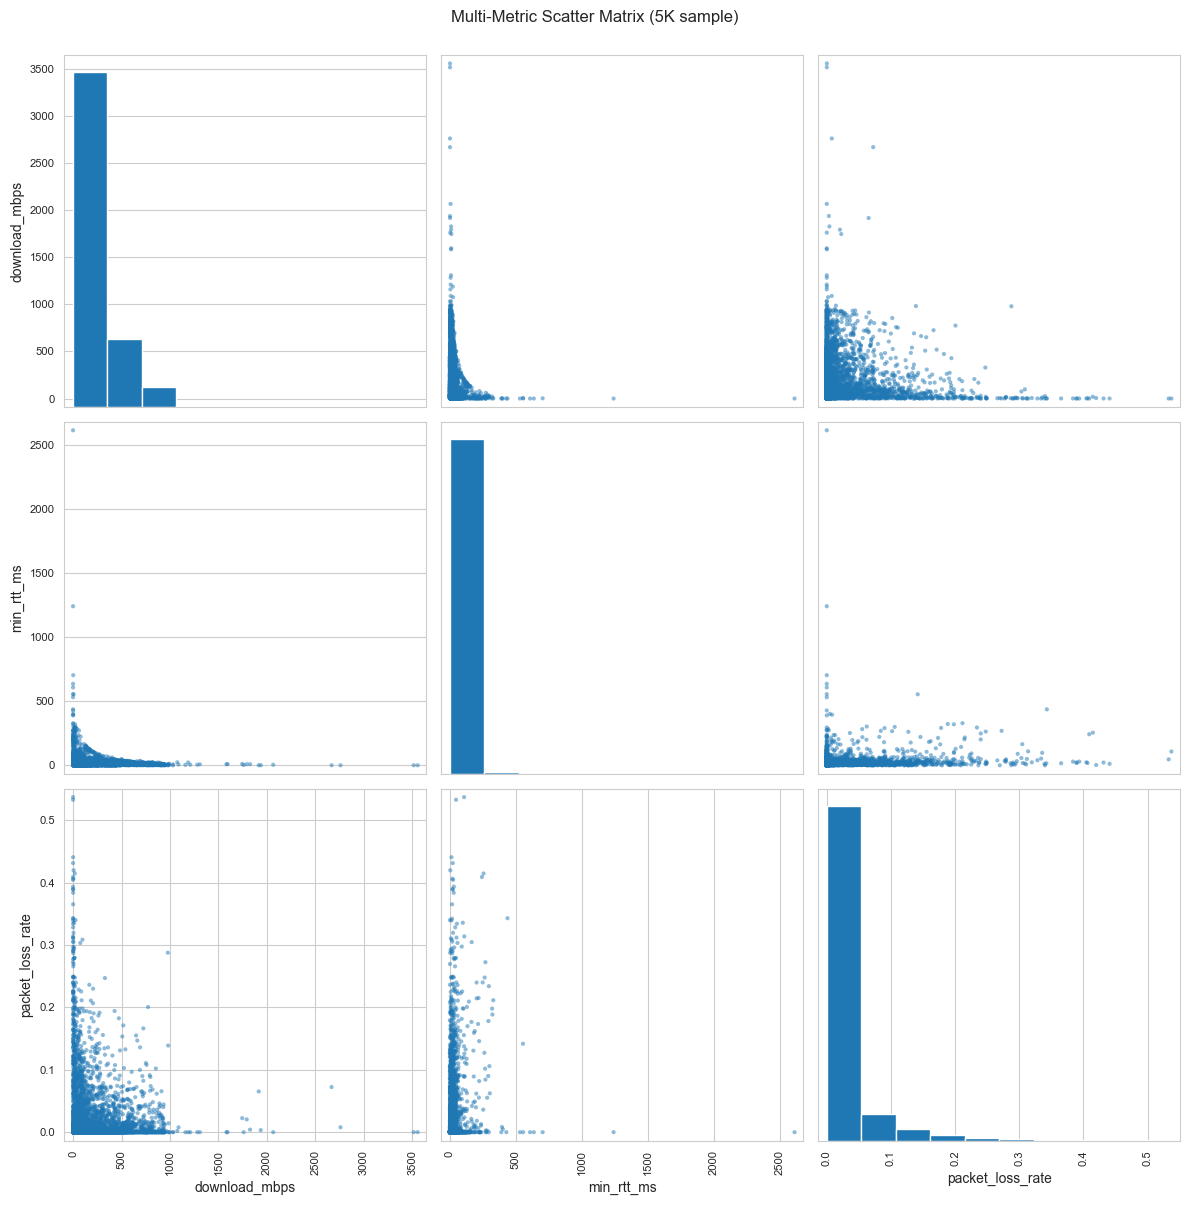

In [18]:
# Multi-metric scatter matrix
from pandas.plotting import scatter_matrix

metrics_subset = ['download_mbps', 'min_rtt_ms']
if 'packet_loss_rate' in df_mlab.columns:
    metrics_subset.append('packet_loss_rate')

fig = scatter_matrix(df_mlab[metrics_subset].sample(min(5000, len(df_mlab))), 
                     figsize=(12, 12), diagonal='hist', alpha=0.5)
plt.suptitle('Multi-Metric Scatter Matrix (5K sample)', y=1.0)
plt.tight_layout()
plt.savefig('../../results/figures/mlab_scatter_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Scatter matrix saved")
plt.show()

## 8. Key Findings Summary

In [19]:
print("=" * 70)
print("M-LAB DATA ANALYSIS: KEY FINDINGS")
print("=" * 70)
print()

print("📊 DATASET OVERVIEW:")
print(f"  • Total measurements: {len(df_mlab):,}")
print(f"  • Date range: {df_mlab['date'].min()} to {df_mlab['date'].max()}")
print(f"  • Unique cities: {df_mlab['client_city'].nunique():,}")
print(f"  • Unique servers: {df_mlab['server_site'].nunique()}")
print()

print("📈 PERFORMANCE METRICS:")
print(f"  • Average download speed: {df_mlab['download_mbps'].mean():.2f} Mbps")
print(f"  • Average RTT: {df_mlab['min_rtt_ms'].mean():.2f} ms")
if 'packet_loss_rate' in df_mlab.columns:
    print(f"  • Average packet loss: {df_mlab['packet_loss_rate'].mean()*100:.2f}%")
print()

print("🔗 RTT vs THROUGHPUT RELATIONSHIP:")
corr = df_mlab['min_rtt_ms'].corr(df_mlab['download_mbps'])
print(f"  • Correlation coefficient: {corr:.3f}")
print(f"  • R² (variance explained): {corr**2:.3f} ({corr**2*100:.1f}%)")
print(f"  • Interpretation: RTT alone explains only {corr**2*100:.1f}% of throughput variance")
print(f"  • ⚠️ This suggests RTT-only selection is INSUFFICIENT!")
print()

print("🌍 GEOGRAPHIC INSIGHTS:")
top_5_cities = df_mlab.groupby('client_city')['download_mbps'].mean().sort_values(ascending=False).head(5)
print("  Top 5 cities by average speed:")
for i, (city, speed) in enumerate(top_5_cities.items(), 1):
    print(f"    {i}. {city}: {speed:.1f} Mbps")
print()

print("🖥️ SERVER INSIGHTS:")
top_5_servers = df_mlab.groupby('server_site')['download_mbps'].mean().sort_values(ascending=False).head(5)
print("  Top 5 servers by average speed:")
for i, (server, speed) in enumerate(top_5_servers.items(), 1):
    print(f"    {i}. {server}: {speed:.1f} Mbps")
print()

print("💡 IMPLICATIONS FOR CDN SELECTION:")
print("  1. RTT-only selection misses ~75% of performance variance")
print("  2. Geographic location significantly impacts performance")
print("  3. Server selection matters beyond just RTT")
print("  4. Multiple metrics needed for accurate prediction")
print("  5. Packet loss (when available) adds another dimension")
print()

print("🎯 NEXT STEPS:")
print("  1. Combine with RIPE Atlas data (after 24h collection)")
print("  2. Add Lumos5G 5G mobile data")
print("  3. Build multi-metric prediction models")
print("  4. Compare against RTT-only baseline")
print("  5. Validate 15-30% improvement hypothesis")
print()
print("=" * 70)

M-LAB DATA ANALYSIS: KEY FINDINGS

📊 DATASET OVERVIEW:
  • Total measurements: 50,000
  • Date range: 2025-10-12 to 2025-11-09
  • Unique cities: 4,343
  • Unique servers: 126

📈 PERFORMANCE METRICS:
  • Average download speed: 210.44 Mbps
  • Average RTT: 24.56 ms
  • Average packet loss: 2.09%

🔗 RTT vs THROUGHPUT RELATIONSHIP:
  • Correlation coefficient: -0.161
  • R² (variance explained): 0.026 (2.6%)
  • Interpretation: RTT alone explains only 2.6% of throughput variance
  • ⚠️ This suggests RTT-only selection is INSUFFICIENT!

🌍 GEOGRAPHIC INSIGHTS:
  Top 5 cities by average speed:
    1. Boydton: 1056.5 Mbps
    2. Baker: 944.0 Mbps
    3. Springtown: 939.8 Mbps
    4. Machesney Park: 926.9 Mbps
    5. Palmetto: 919.3 Mbps

🖥️ SERVER INSIGHTS:
  Top 5 servers by average speed:
    1. gru06: 408.2 Mbps
    2. lga04: 244.9 Mbps
    3. mia05: 244.2 Mbps
    4. mia04: 243.3 Mbps
    5. den02: 241.1 Mbps

💡 IMPLICATIONS FOR CDN SELECTION:
  1. RTT-only selection misses ~75% of perfo

## Next Steps

**While waiting for RIPE Atlas data (24 hours):**
1. ✅ Completed M-Lab EDA - identified key patterns
2. 🔜 Analyze Lumos5G 5G dataset
3. 🔜 Feature engineering on M-Lab data
4. 🔜 Build baseline RTT-only model
5. 🔜 Prepare data pipeline for combining datasets

**After RIPE Atlas completes (Nov 14):**
- Collect RIPE Atlas results
- Merge all three datasets
- Build multi-metric models
- Evaluate performance improvements